# ODS NLP Course: seminar 2
## LogReg, TFiDf ,  Classification


# [1] Linear models

## [1.1] Regression Problem: Linear Regression

### [1.1.1] Problem Statement

Let's predict the behavior of a linear function
$$y = 2x_1 + 5x_2 - 3$$

Linear Equation of Multiple Variables for  𝑘
 The observation will look like this:
$$y^{[k]} = x^{[k]}_1 \cdot w_1 + \dots + x^{[k]}_m \cdot w_m + b$$

The same equation in vector form via **dot product**:
$$y^{[k]} = {\bf x}^{[k]} \cdot {\bf w} + b$$

The same equation in matrix form through **the matrix product**:
$$y^{[k]} = X^{[k]}_{[1;\ m]} \times W_{[m;\ 1]} + b$$

The same equation when generalized to all  ∗
  observations, moreover,  𝑡
  different targets:
$${Y}_{[*;\ t]} = {X}_{[*;\ m]} \times {W}_{[m;\ t]} + {b}_{[*;\ t]}$$

In [1]:
import numpy as np

In [2]:
# given parameters
W_true = [[2],[5]]
b_true = [[-3]]

# generated observations

np.random.seed(42)
X = np.random.randint(low=-20,high=20,size=(20,len(W_true))) + 0.0
y = X@W_true+b_true
X, y


(array([[ 18.,   8.],
        [ -6., -13.],
        [  0.,  18.],
        [ -2.,   2.],
        [-10., -10.],
        [  3.,  15.],
        [ 19.,   3.],
        [-18.,   1.],
        [-19.,   3.],
        [  9.,  17.],
        [-19.,   0.],
        [ 12.,  -9.],
        [  1.,   4.],
        [  6.,   7.],
        [ -5.,  -6.],
        [-18.,  16.],
        [-14.,   0.],
        [-12.,  18.],
        [ -3., -17.],
        [  4.,  -7.]]),
 array([[ 73.],
        [-80.],
        [ 87.],
        [  3.],
        [-73.],
        [ 78.],
        [ 50.],
        [-34.],
        [-26.],
        [100.],
        [-41.],
        [-24.],
        [ 19.],
        [ 44.],
        [-43.],
        [ 41.],
        [-31.],
        [ 63.],
        [-94.],
        [-30.]]))

Let's consider the contribution of the parameter to the specular derivative
$$\frac{\Delta L}{\Delta p} ≈
\frac{\partial L}{\partial p} =
\frac{\partial L}{\partial \bar{y}}
\frac{\partial \bar{y}}{\partial p} =
L^{'}_{\bar{y}} \cdot \frac{\partial \bar{y}}{\partial p}
$$

Accordingly, derivatives of  $𝑏$ and $𝑤_𝑖$:
$$\begin{align}
\frac{\partial L}{\partial b} &= L^{'}_\bar{y} \cdot 1 \\
\frac{\partial L}{\partial w_i} &= L^{'}_{\bar{y}} \cdot x_i
\end{align}$$

In matrix form, you get:
$$\begin{align}
\frac{\partial L}{\partial b}_{[*;\ t]} &= {L^{'}_\bar{Y}}_{[*;\ t]}\\
\frac{\partial L}{\partial W}_{[m;\ t]} &= X^T_{[m;\ *]} \times {L^{'}_\bar{Y}}_{[*;\ t]}
\end{align}$$




In [3]:
def equation(w=np.array([2, 5]), b=np.array(3)):
    return 'y = ' + ' + '.join(f'{w[i].item():.2f}*x{i+1}' for i in range(len(w))) + f' + {b.item():.2f}'
equation()

'y = 2.00*x1 + 5.00*x2 + 3.00'

## [1.1.2] NumPy solution

In [4]:
# сгенерированные данные
np.random.seed(42)
W_true = np.array([[2], [5]])
b_true = -3
X = np.random.randint(-20, 20, (20, len(W_true))) + 0.0
y = X @ W_true + b_true

def np_train(X, y, lr=0.005, max_iter=1000):
    # предсказываемые параметры
    W = np.zeros((X.shape[-1], y.shape[-1]))
    b = np.zeros((1, y.shape[-1]))

    for i in range(1, max_iter+1):
        # предсказание и ошибка
        y_pred = X @ W + b
        loss = np.sum((y_pred - y) ** 2) / len(y)

        # расчёт градиентов
        L_grad = (2/len(y)) * (y_pred - y)
        b_grad = np.sum(L_grad)
        W_grad = np.sum(X.T @ L_grad, axis=1, keepdims=True)

        # шаг градиента
        W -= lr * W_grad
        b -= lr * b_grad

        # прогресс
        if i == 1 or i % 100 == 0:
            print(f"step {i:3}:", equation(W, b), f"loss: {loss.item():.6f}", sep='\t')

np_train(X, y)

step   1:	y = 2.90*x1 + 5.65*x2 + 0.04	loss: 3390.100000
step 100:	y = 2.02*x1 + 4.97*x2 + -1.75	loss: 1.423337
step 200:	y = 2.01*x1 + 4.99*x2 + -2.49	loss: 0.236051
step 300:	y = 2.00*x1 + 5.00*x2 + -2.79	loss: 0.039147
step 400:	y = 2.00*x1 + 5.00*x2 + -2.92	loss: 0.006492
step 500:	y = 2.00*x1 + 5.00*x2 + -2.97	loss: 0.001077
step 600:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000179
step 700:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000030
step 800:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000005
step 900:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000001
step 1000:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000000


### [1.1.3] Torch Solution

In [5]:
import torch

In [6]:
# generated data

X = torch.tensor(X).to(torch.float32)

y = X @ W_true + b_true

def torch_train(X, y, lr=0.005, max_iter=1000):
    # predicted parameters

    W = torch.zeros(X.shape[1], y.shape[1], requires_grad=True)
    b = torch.zeros(y.shape[1], requires_grad=True)

    for i in range(1, max_iter+1):
        # prediction and error

        y_pred = X @ W + b
        loss = torch.mean((y_pred - y) ** 2)

      # calculation of gradients
        loss.backward()

        with torch.no_grad():
         # gradient step
            W -= lr * W.grad
            b -= lr * b.grad

            # reset the accumulated gradient (inplace)
            W.grad.zero_()
            b.grad.zero_()

        # progress

        if i == 1 or i % 100 == 0:
            print(f"step {i:3}:", equation(W, b), f"loss: {loss.item():.6f}", sep='\t')

torch_train(X, y)

step   1:	y = 2.90*x1 + 5.64*x2 + 0.04	loss: 3390.100000
step 100:	y = 2.02*x1 + 4.97*x2 + -1.75	loss: 1.423340
step 200:	y = 2.01*x1 + 4.99*x2 + -2.49	loss: 0.236050
step 300:	y = 2.00*x1 + 5.00*x2 + -2.79	loss: 0.039147
step 400:	y = 2.00*x1 + 5.00*x2 + -2.92	loss: 0.006492
step 500:	y = 2.00*x1 + 5.00*x2 + -2.97	loss: 0.001077
step 600:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000179
step 700:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000030
step 800:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000005
step 900:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000001
step 1000:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000000


## [1.2] Classification Objective: Logistic Regression

### [1.2.1] Data analysis

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
import pandas as pd
df = pd.DataFrame(iris.data,columns= iris.feature_names)
df['target']= iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


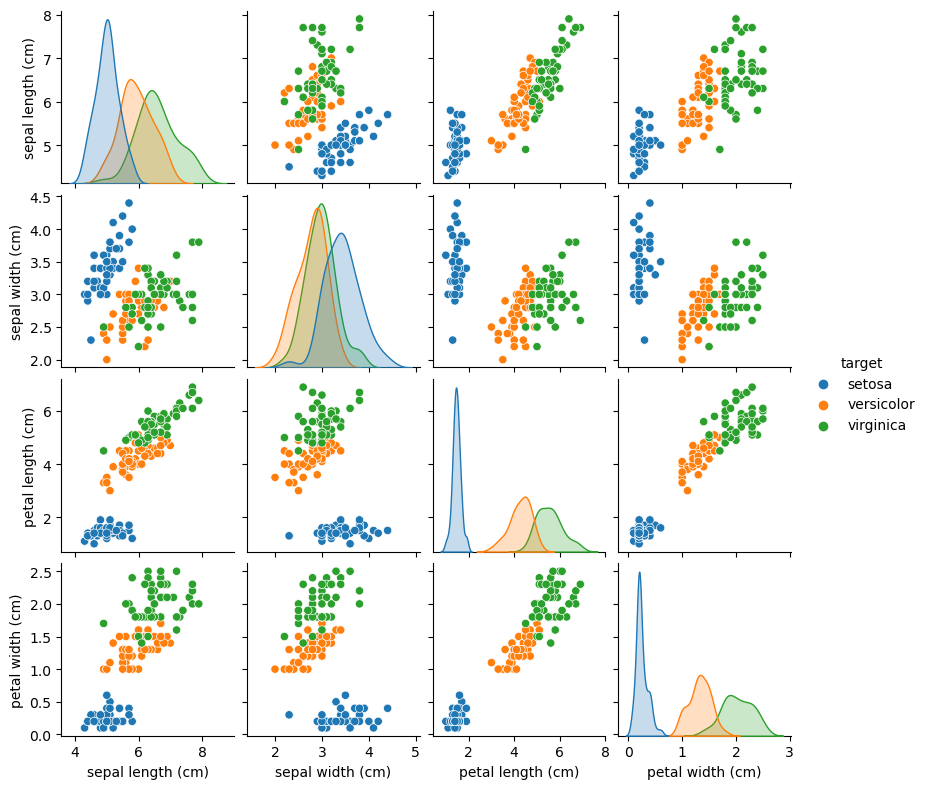

In [10]:
import seaborn as sns
sns.pairplot(df,hue='target', height=2)
#hue means depicting the differnt categorical varialble of target 

### [1.2.2] Scikit-learn solution

In [11]:
# from sklearn.model_selection import train_test_split

def train_test_split(*args,test_size = 0.33, random_state =42) -> tuple[torch.Tensor]:
    torch.manual_seed(random_state)
    idx = torch.randperm(n := args[0].shape[0])
    test = round(n*test_size)
    return tuple(
        torch.Tensor(result)
        for arg in args
        for result in (arg[idx[:-test]],arg[idx[-test:]])
    )

X , y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[y!=2],y[y!=2][:,None])
y_train.T, y_test.T

(tensor([[0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
          1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
          1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
          1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.]]))

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train.ravel())
equation(clf.coef_.T,clf.intercept_)

'y = 0.42*x1 + -0.90*x2 + 2.08*x3 + 0.86*x4 + -5.77'

### [1.2.3] Torch classifier


**SoftMax**

To classify, you need to make a decision somehow, for example, through confidence from 0 to 1

For example, SoftMax for $k$-classes is defined:
$$\begin{align}
\text{SoftMax}(z_i) = \frac{e^{z_i}}{e^{z_1} + \dots + e^{z_k}}
\end{align}$$

*it’s not difficult to notice that:
- $\text{SoftMax}(z_1) + \dots + \text{SoftMax}(z_k) = 1$
- $\text{SoftMax}(z_i) \in [0, 1]$


**Sigmoid**

Softmax can also be used for 2 classes:
$$\text{SoftMax}(z_1) = \frac{e^{z_1}}{e^{z_1} + e^{z_2}} = \frac{1}{1 + e^{z_2-z_1}}$$

But for 2 classes it is enough to predict only one class

Those. if we put $z_2 = 0$ then we get Sigmoid:
$$\text{Sigmoid}(z) = \frac{1}{1 + e^{-z}}$$

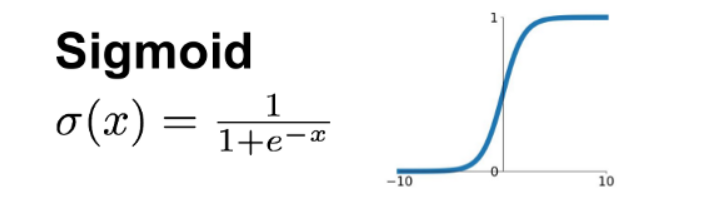

Likelihood Maximization
$$likehood = ∏ [y_{pred}=1]^{[y_{real}=1]} [y_{pred}=0]^{[y_{real}=0]}$$
$$likehood = ∏ {y_{pred}}^{y_{real}} (1-y_{pred})^{1-y_{real}}$$
$$log\_likehood = Σ \log({y_{pred}}^{y_{real}}) + \log((1-y_{pred})^{1-y_{real}})$$
$$log\_likehood\_loss = - Σ \log({y_{pred}}^{y_{real}}) - \log((1-y_{pred})^{1-y_{real}})$$

In [13]:
class LogisticRegression2:
    def __init__(self): pass

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + torch.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(X @ self.W + self.b)

    def predict(self, X, threshold=0.5): # по классам
        with torch.no_grad():
            proba = self.predict_proba(torch.Tensor(X))
            return (proba > threshold).to(int)

    def score(self, X, y):
        return (self.predict(X_test) == y_test).to(float).mean().item()

    @staticmethod
    def loss(y_true, y_pred):
        return -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()

    def fit(self, X, y, lr=0.5, max_iter=1000):
        # предсказываемые параметры
        self.W = torch.ones(X.shape[1], y.shape[1], requires_grad=True)
        self.b = torch.zeros(y.shape[1], requires_grad=True)

        for i in range(1, max_iter+1):
            # предсказание и ошибка
            y_pred = self.predict_proba(X)
            loss = self.loss(y, y_pred)

            # расчёт градиентов
            loss.backward()

            with torch.no_grad():
                # шаг градиента
                self.W -= lr * self.W.grad
                self.b -= lr * self.b.grad

                # обнуление накопленного градиента (inplace)
                self.W.grad.zero_()
                self.b.grad.zero_()

            # прогресс
            if i == 1 or i % 10 == 0:
                print(f"step {i:3}:", equation(self.W, self.b), f"loss: {loss.item():.4f}", f"acc: {self.score(X, y):.4f}", sep='\t')

clf2 = LogisticRegression2()
clf2.fit(X_train, y_train, max_iter=100)

step   1:	y = -0.20*x1 + 0.16*x2 + 0.65*x3 + 0.94*x4 + -0.24	loss: 4.9028	acc: 0.4545
step  10:	y = -0.56*x1 + -0.69*x2 + 1.60*x3 + 1.35*x4 + -0.39	loss: 0.0801	acc: 1.0000
step  20:	y = -0.56*x1 + -0.84*x2 + 1.84*x3 + 1.45*x4 + -0.40	loss: 0.0424	acc: 1.0000
step  30:	y = -0.59*x1 + -0.96*x2 + 2.00*x3 + 1.52*x4 + -0.42	loss: 0.0325	acc: 1.0000
step  40:	y = -0.60*x1 + -1.06*x2 + 2.13*x3 + 1.58*x4 + -0.43	loss: 0.0264	acc: 1.0000
step  50:	y = -0.62*x1 + -1.13*x2 + 2.24*x3 + 1.62*x4 + -0.45	loss: 0.0223	acc: 1.0000
step  60:	y = -0.63*x1 + -1.20*x2 + 2.33*x3 + 1.66*x4 + -0.45	loss: 0.0193	acc: 1.0000
step  70:	y = -0.64*x1 + -1.26*x2 + 2.41*x3 + 1.70*x4 + -0.46	loss: 0.0171	acc: 1.0000
step  80:	y = -0.65*x1 + -1.31*x2 + 2.48*x3 + 1.73*x4 + -0.47	loss: 0.0153	acc: 1.0000
step  90:	y = -0.66*x1 + -1.36*x2 + 2.55*x3 + 1.76*x4 + -0.48	loss: 0.0139	acc: 1.0000
step 100:	y = -0.66*x1 + -1.40*x2 + 2.60*x3 + 1.78*x4 + -0.48	loss: 0.0127	acc: 1.0000


In [14]:
df_pred = pd.DataFrame({
    "sklearn": clf.predict_proba(X_test)[:, 1],
    "torch": clf2.predict_proba(X_test)[:, 0].detach().numpy()
    })

df_pred.sort_values(by='torch').reset_index(drop=True).plot()

<AxesSubplot:>

### [1.2.4] Torch pipeline

In [15]:
y_encoded = (np.unique(y)[None, :] == y[:, None]) + 0.0
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded)

In [16]:
class TorchLogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs=1):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=n_inputs, out_features=n_outputs)

    def forward(self, X):
        # return torch.sigmoid(self.linear(X), dim=1)
        return torch.softmax(self.linear(X), dim=1)

    def score(self, X, y):
        y_pred = torch.argmax(self(X), dim=1)
        y_true = torch.argmax(y, dim=1)
        return (y_true == y_pred).to(float).mean().item()

model = TorchLogisticRegression(X.shape[1], y_encoded.shape[1])

In [17]:
def torch_train(model, X, y, lr=0.005, max_iter=4000):
    # loss_function = torch.nn.BCELoss()
    loss_function = torch.nn.CrossEntropyLoss()

    # предсказываемые параметры
    optimizer = torch.optim.SGD(model.parameters(), lr)

    for i in range(1, max_iter+1):
        # предсказание и ошибка
        y_pred = model(X)
        loss = loss_function(y_pred, y)

        # расчёт градиентов
        loss.backward()

        # шаг градиента
        optimizer.step()
        # обнуление накопленного градиента
        optimizer.zero_grad()

        # прогресс
        if i == 1 or i % 1000 == 0:
            print(f"step {i:3}:", f"loss: {loss.item():.4f}", f"acc: {model.score(X, y):.2f}", sep='\t')

torch_train(model, X_train, y_train)
print('Test acc:', model.score(X_test, y_test))

step   1:	loss: 1.1873	acc: 0.29
step 1000:	loss: 0.8702	acc: 0.67
step 2000:	loss: 0.8113	acc: 0.81
step 3000:	loss: 0.7793	acc: 0.98
step 4000:	loss: 0.7558	acc: 0.99
Test acc: 0.92


In [18]:
y_pred = model.linear(X_test)
y_pred

tensor([[-3.2503e+00, -7.5004e-01, -1.0188e+00],
        [-2.6268e+00, -7.4422e-01, -1.3446e+00],
        [-3.2525e+00, -7.5957e-01, -9.5983e-01],
        [ 1.8740e+00, -4.0341e-01, -3.3838e+00],
        [ 2.0018e+00, -4.5425e-01, -3.5653e+00],
        [ 3.1131e+00, -2.8683e-01, -3.8712e+00],
        [-5.0917e+00, -6.8369e-01,  3.9628e-01],
        [-2.2497e+00, -6.5904e-01, -1.3320e+00],
        [ 1.9523e+00, -4.5361e-01, -3.5093e+00],
        [-4.7086e+00, -7.2281e-01,  5.9348e-04],
        [-4.8496e+00, -8.7880e-01, -3.5567e-01],
        [-2.5797e+00, -5.5778e-01, -9.3874e-01],
        [ 2.2842e+00, -3.8175e-01, -3.5601e+00],
        [-2.5561e+00, -6.0629e-01, -1.0515e+00],
        [-4.9828e+00, -6.9719e-01,  3.1539e-01],
        [ 2.3790e+00, -4.4861e-01, -3.8328e+00],
        [-6.9698e+00, -1.0224e+00,  7.3072e-01],
        [-3.6844e+00, -7.5986e-01, -7.0545e-01],
        [-3.8026e+00, -6.4449e-01, -3.2000e-01],
        [-4.3749e+00, -7.1478e-01, -6.0442e-02],
        [-4.0027e+00

In [19]:
y_pred

tensor([[-3.2503e+00, -7.5004e-01, -1.0188e+00],
        [-2.6268e+00, -7.4422e-01, -1.3446e+00],
        [-3.2525e+00, -7.5957e-01, -9.5983e-01],
        [ 1.8740e+00, -4.0341e-01, -3.3838e+00],
        [ 2.0018e+00, -4.5425e-01, -3.5653e+00],
        [ 3.1131e+00, -2.8683e-01, -3.8712e+00],
        [-5.0917e+00, -6.8369e-01,  3.9628e-01],
        [-2.2497e+00, -6.5904e-01, -1.3320e+00],
        [ 1.9523e+00, -4.5361e-01, -3.5093e+00],
        [-4.7086e+00, -7.2281e-01,  5.9348e-04],
        [-4.8496e+00, -8.7880e-01, -3.5567e-01],
        [-2.5797e+00, -5.5778e-01, -9.3874e-01],
        [ 2.2842e+00, -3.8175e-01, -3.5601e+00],
        [-2.5561e+00, -6.0629e-01, -1.0515e+00],
        [-4.9828e+00, -6.9719e-01,  3.1539e-01],
        [ 2.3790e+00, -4.4861e-01, -3.8328e+00],
        [-6.9698e+00, -1.0224e+00,  7.3072e-01],
        [-3.6844e+00, -7.5986e-01, -7.0545e-01],
        [-3.8026e+00, -6.4449e-01, -3.2000e-01],
        [-4.3749e+00, -7.1478e-01, -6.0442e-02],
        [-4.0027e+00


# [2] Quality metrics
- [Yandex textbook: metrics](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)


## [2.1] Binary classification


### [2.1.1] Accuracy
- easier and more correct to remember as the number of matches
- accuracy is often found, but it’s better not to say that

$$Accuracy = \frac{[y_{real}==y_{pred}]}{[y_{pred}]} = \frac{correct\ predictions}{all\ predictions}$$

In [20]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()


### [2.1.2] Precision & Recall

The problem may be such that we are only interested in predicting the label<<$+$>>

Then two metrics stand out:
- **Precision** - accuracy, pinpoint aiming (like grafting)
- **Recall** – completeness, complete solution to the problem (like an antibiotic)


$$Precision = \frac{TP}{TP+FP} = \frac{TP}{[y_{pred}^+]} = \frac{[y_{real}^+==y_{pred}^+] }{[y_{pred}^+]} = \frac{correctly\predicted\ +}{all\predicted\ +}$$
$$Recall = \frac{TP}{TP+FN} = \frac{TP}{[y_{real}^+]} = \frac{[y_{real}^+==y_{pred}^+] }{[y_{real}^+]} = \frac{correctly\ predicted\ +}{all\ real\ +}$$


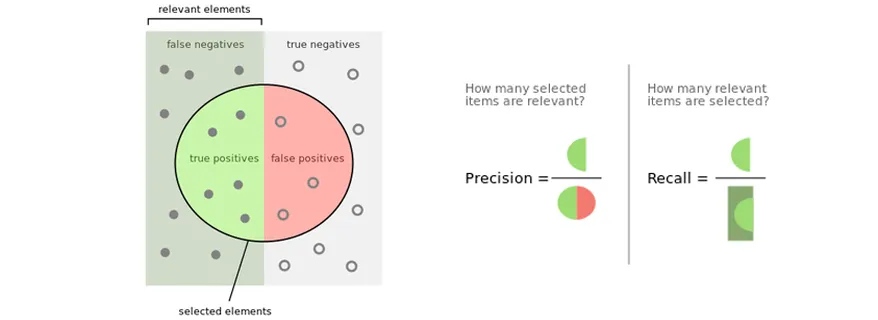

In [21]:
def precision(y_real, y_pred):
    return (y_real*y_pred).sum()/ y_pred.sum()

In [22]:
def recall(y_real, y_pred):
    return (y_real*y_pred).sum() / y_real.sum()

### [2.1.3] F-score

There is a desire to minimize both metrics

You can make an arithmetic average, but such a calculation will equate the following situations:
- $Precision≈0, Recall≈1$
- $Precision≈0.5, Recall≈0.5$
- $Precision≈1, Recall≈0$

What kind of situations could these be and why is it bad that they are equated?

The universal solution is considered to be **harmonic mean**

$$F_1{score} = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}} = \frac{2\ Precision\ Recall}{Precision+{Recall}} = \frac{2\ (correctly\ predicted\ +)}{(all\ real\ +) + (all\ predicted\ +)}$$

In [23]:
def f1_score(y_real, y_pred):
    return 2 * (y_real * y_pred).sum() / (y_real.sum() + y_pred.sum())


The generalization of $F_1 score$ is the weighted $F_𝛽score$

$$F_{score} = \frac{2}{\frac{𝛽^2}{1+𝛽^2}\frac{1}{Recall}+\frac{1}{1+𝛽^2}\frac{1}{Precision}} = (1+𝛽^2) \frac{\ Precision\ Recall}{𝛽^2 Precision+Recall} = \frac{(1+𝛽^2)\ (correctly\ predicted\ +)}{𝛽^2(all\ real\ +) + (all\ predicted\ +)}$$
- $𝛽 \nearrow^ \infty$ — only $Recall$ remains
- $𝛽 \searrow_0$ — only $Precision$ remains

In [24]:
def fb_score(y_real, y_pred, b=1):
    return (1+b*b) * (y_real * y_pred).sum() / (b*b * y_real.sum() + y_pred.sum())

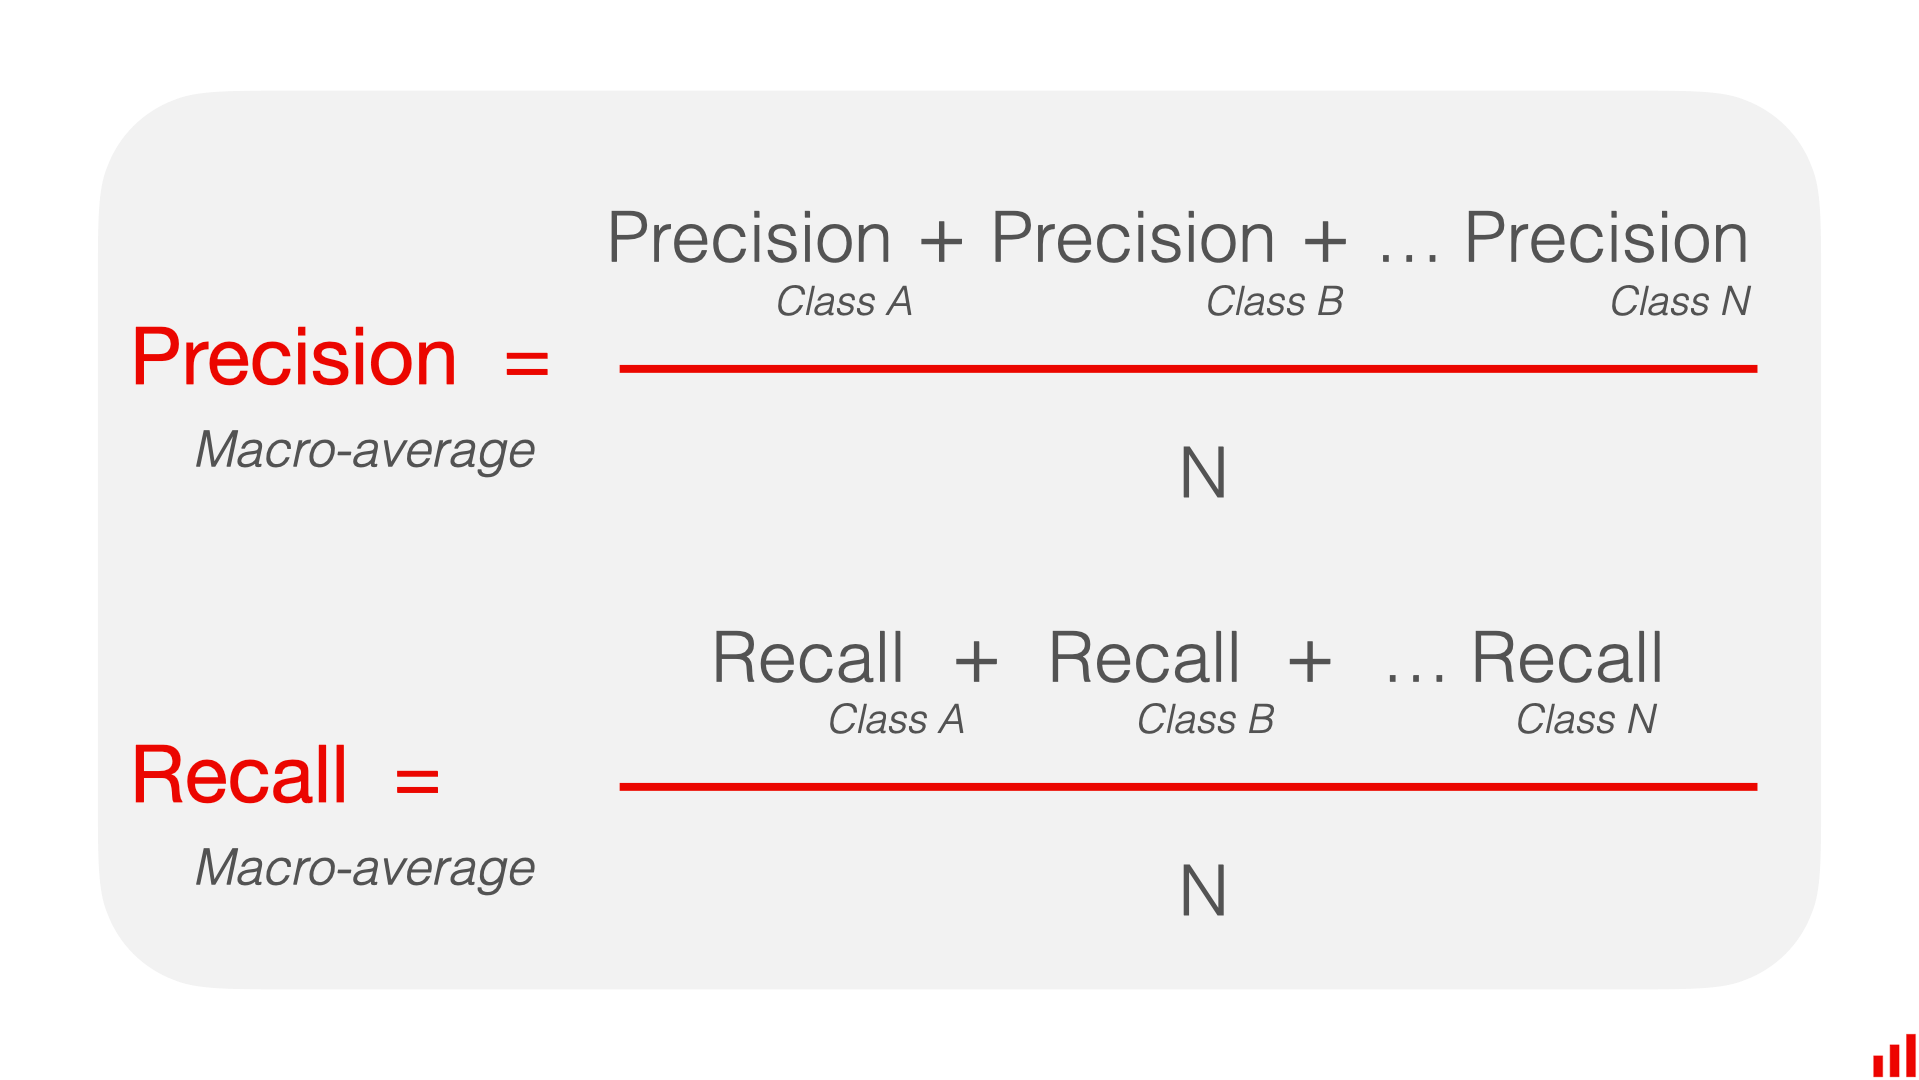

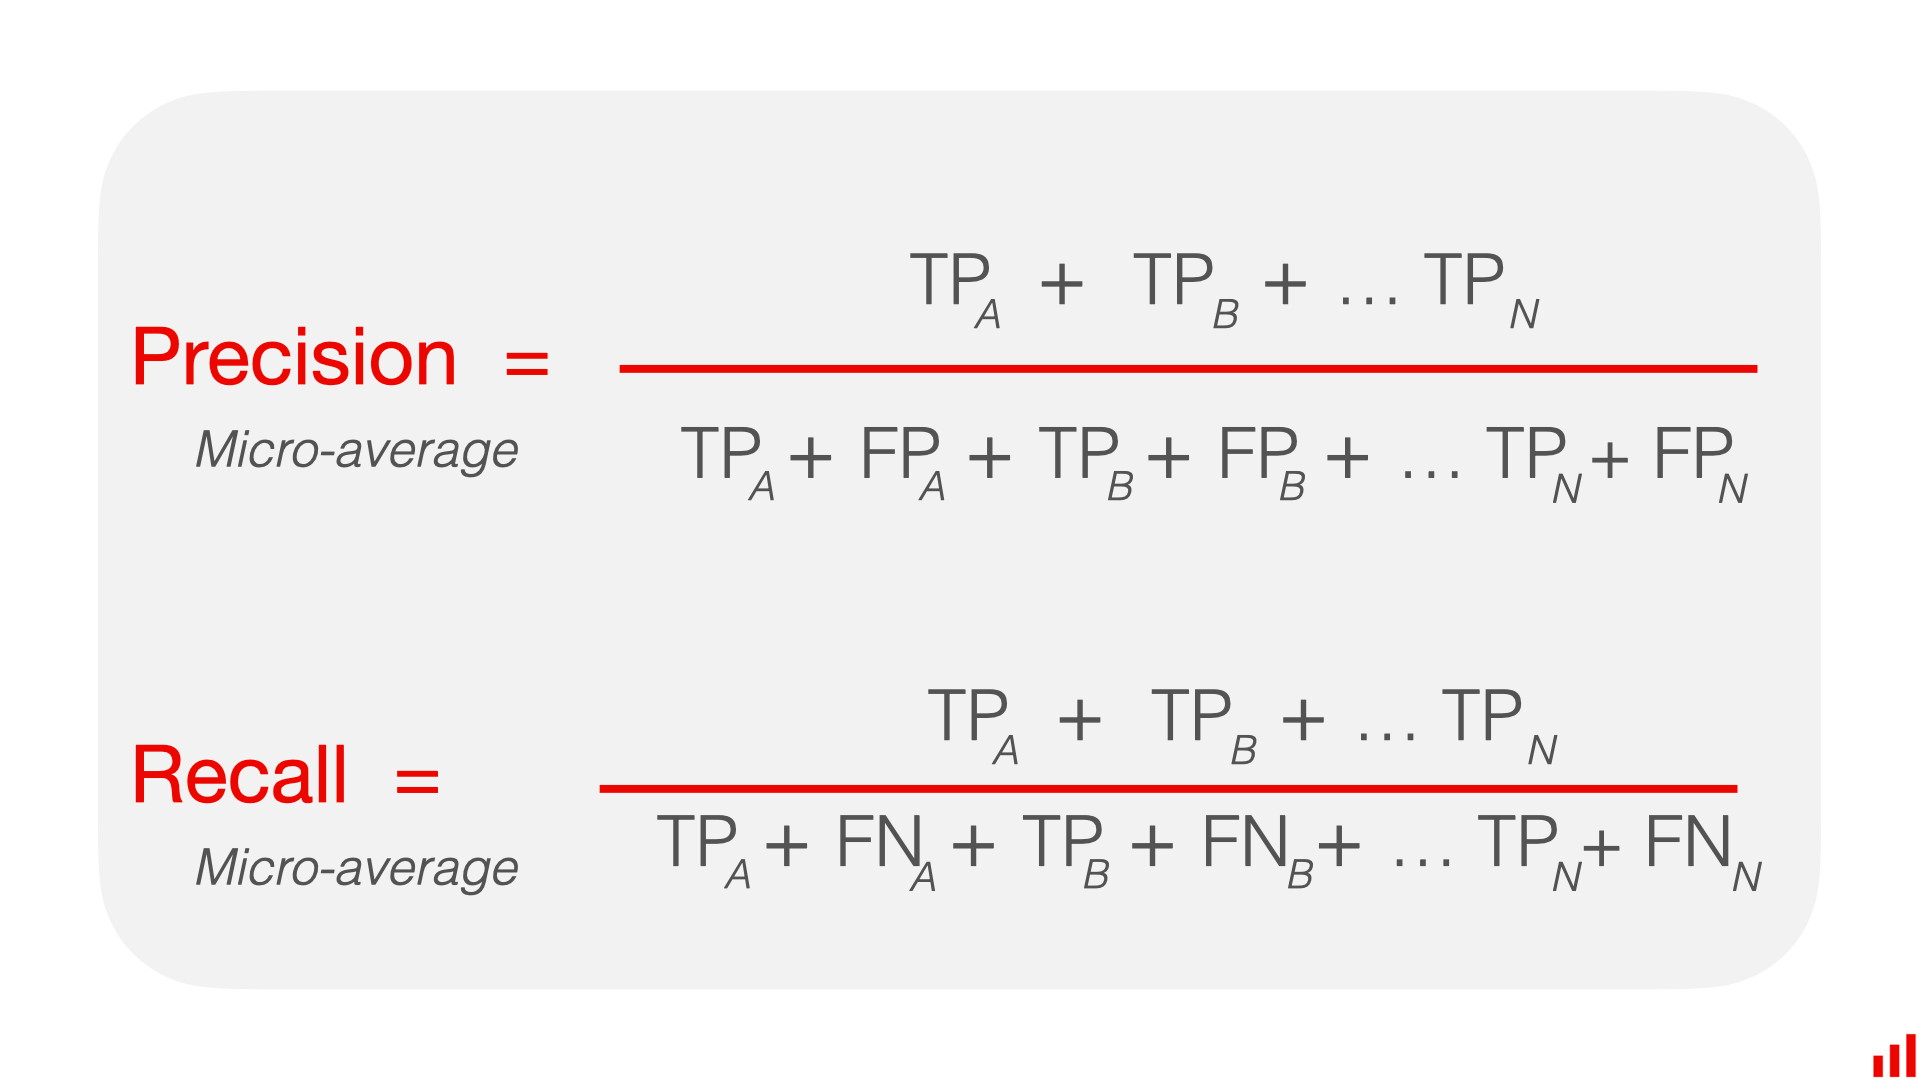

In [25]:
from sklearn.metrics import classification_report

y_pred = (model(X_test)>0.5).to(int).detach().numpy


In [26]:
from sklearn.metrics import classification_report

y_pred = (model(X_test) > 0.5).to(int).detach().numpy()
y_ture = (y_test.to(int)).detach().numpy()
print(classification_report(y_ture, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.76      0.87        17
           2       0.84      1.00      0.91        21

   micro avg       0.92      0.92      0.92        50
   macro avg       0.95      0.92      0.93        50
weighted avg       0.93      0.92      0.92        50
 samples avg       0.92      0.92      0.92        50



# [3] Text Classification

## [3.1] TF-iDF vectorization

### [3.1.1] Data analysis

In [27]:
# Download the demo dataset
import nltk

nltk.download("movie_reviews", download_dir = 'movie_reviews')

[nltk_data] Downloading package movie_reviews to movie_reviews...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [28]:
# Let's assemble the corpus in a DataFrame
from pathlib import Path
import pandas as pd

paths = list(Path('movie_reviews').glob('**/*.txt'))
df = pd.DataFrame([
    {'text':path.read_text("utf-8"),
    'label': path.parent.name}
    for path in paths
])

df.head()

,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [29]:
# tain_test_split

partition = round(0.7 * len(df))
df_shuffled = df.sample(frac = 1, random_state=42)

train_df = df_shuffled.iloc[:partition]
test_df = df_shuffled.iloc[partition:]

train_texts, train_labels = train_df['text'], train_df['label']
test_texts, test_labels = test_df['text'], test_df['label']

In [30]:
# simple tokenizer
import re

def tokenize(texts, lower= True, token_pattern =r"(?i)\b[a-z]{2,}\b" ) -> pd.Series:
    texts = pd.Series(texts)
    if lower: texts = texts.str.lower()
        
    tokenizer = re.compile(token_pattern)
    return texts.apply(tokenizer.findall)

train_texts_tokenized = tokenize(train_texts)
train_texts_tokenized

1860    [the, verdict, spine, chilling, drama, from, h...
353     [the, caliber, killer, has, struck, again, sta...
1333    [in, the, company, of, men, made, splash, at, ...
905     [in, the, year, captain, leo, davidson, mark, ...
1289    [note, that, followups, are, directed, to, rec...
                              ...                        
1917    [plot, dude, and, his, brother, are, driving, ...
753     [bruce, willis, needs, to, stay, away, from, s...
498     [think, we, should, as, responsible, citizens,...
1276    [living, out, loud, is, the, type, of, motion,...
1325    [remember, hearing, about, this, film, when, i...
Name: text, Length: 1400, dtype: object

### [3.1.2] Manual solution

In [31]:
def word_counter(texts_tokenized) -> pd.DataFrame:
    term_counts = pd.DataFrame(columns=['doc', 'term', 'count'])

    for i, text_tokenized in enumerate(texts_tokenized):
        terms, counts = np.unique(text_tokenized, return_counts=True)
        df_counts = pd.DataFrame({'doc': i, 'term': terms, 'count': counts})
        term_counts = pd.concat([term_counts, df_counts], ignore_index=True)

    return term_counts

train_term_counts = word_counter(train_texts_tokenized)
train_term_counts

,doc,term,count
0,0,about,1
1,0,above,1
2,0,absolutely,1
3,0,accident,1
4,0,achieves,1
...,...,...,...
460679,1399,wrote,1
460680,1399,year,1
460681,1399,years,1
460682,1399,you,2


$$\begin{align}
TF(t, d) &= \frac{\text{count of t in d}}{\text{count of all terms in d}} \\
IDF(t) &= \log \frac{\text{count of all docs}}{1+(\text{count of docs with t})} \\
TD\_IDF(t, d) &= TD(t, d) \cdot IDF(t)
\end{align}$$


In [32]:
def get_tf_idf(term_counts: pd.DataFrame, smooth_idf=True) -> dict:
    term_counts = term_counts.copy()

    count_of_t_in_d = term_counts['count'].values
    count_of_terms_in_d = term_counts.groupby('doc').sum()['count'][term_counts['doc']].values
    term_counts['tf'] = count_of_t_in_d / count_of_terms_in_d

    count_of_all_docs = term_counts['doc'].nunique()
    count_of_docs_with_t = term_counts.groupby('term')['doc'].nunique()[term_counts['term']].values
    # term_counts['idf'] = np.log((count_of_all_docs) / (1 + count_of_docs_with_t))
    if smooth_idf:
        term_counts['idf'] = np.log((1 + count_of_all_docs) / (1 + count_of_docs_with_t)) + 1
    else:
        term_counts['idf'] = np.log((count_of_all_docs) / (count_of_docs_with_t)) + 1

    term_counts['tfidf'] = term_counts['tf'] * term_counts['idf']
    return term_counts

smooth_idf = False
train_tf_idf = get_tf_idf(train_term_counts, smooth_idf=smooth_idf)
train_tf_idf

,doc,term,count,tf,idf,tfidf
0,0,about,1,0.001294,1.310804,0.001696
1,0,above,1,0.001294,3.562096,0.004608
2,0,absolutely,1,0.001294,3.465104,0.004483
3,0,accident,1,0.001294,4.085344,0.005285
4,0,achieves,1,0.001294,5.299789,0.006856
...,...,...,...,...,...,...
460679,1399,wrote,1,0.001821,3.679879,0.006703
460680,1399,year,1,0.001821,2.164294,0.003942
460681,1399,years,1,0.001821,2.211141,0.004028
460682,1399,you,2,0.003643,1.315690,0.004793


In [33]:
# vocabulary = train_term_counts['term'].unique()
# vocabulary
tf_idf_transform = train_tf_idf.drop_duplicates('term').set_index('term')['idf']
tf_idf_transform

term
about                1.310804
above                3.562096
absolutely           3.465104
accident             4.085344
achieves             5.299789
                       ...   
interpreting         8.244228
misrepresentation    8.244228
orefice              8.244228
upholds              8.244228
whisked              8.244228
Name: idf, Length: 33511, dtype: float64

In [34]:
vocabulary = train_term_counts['term'].unique()
example = ['big big bang']
x = pd.Series(tokenize(example)[0])
x = x[x.isin(vocabulary)]
x = tf_idf_transform[x].groupby('term').sum()
x

term
bang    5.679278
big     4.230355
Name: idf, dtype: float64

In [35]:
from scipy.sparse import csr_array

class TfIdfVectorizer:

    def __init__(self, token_pattern=r"(?i)\b[a-z]{2,}\b", lower=True, smooth_idf=False):
        self.token_pattern = token_pattern
        self.lower = lower
        self.smooth_idf = False
        self.vocab = []
        self.df_ = pd.DataFrame()

    # simple tokenizer
    def tokenize(self, texts: list[str]) -> pd.Series:
        # TODO: [torch.tensor([vocab[w] for w in map(normalize, tokenize(text)) if w in vocab]) for text in corpus]
        texts = pd.Series(texts)
        if self.lower:
            texts = texts.str.lower()
        tokenizer = re.compile(self.token_pattern)
        return texts.apply(tokenizer.findall)

    # let's count the words
    def word_counter(self, texts_tokenized) -> pd.DataFrame:
        term_counts = pd.DataFrame(columns=['doc', 'term', 'count'], dtype=int)

        for i, text_tokenized in enumerate(texts_tokenized):
            terms, counts = np.unique(text_tokenized, return_counts=True)
            df_counts = pd.DataFrame({'doc': i, 'term': terms, 'count': counts})
            term_counts = pd.concat([term_counts, df_counts], ignore_index=True)

        return term_counts

    def get_tf_idf(self, term_counts: pd.DataFrame) -> dict:
        term_counts = term_counts.copy()

        count_of_t_in_d = term_counts['count'].values
        count_of_terms_in_d = term_counts.groupby('doc')['count'].sum()[term_counts['doc']].values
        term_counts['tf'] = count_of_t_in_d / count_of_terms_in_d

        count_of_all_docs = term_counts['doc'].nunique()
        count_of_docs_with_t = term_counts.groupby('term')['doc'].nunique()[term_counts['term']].values
        # term_counts['idf'] = np.log((count_of_all_docs) / (1 + count_of_docs_with_t))
        if self.smooth_idf:
            term_counts['idf'] = np.log((1 + count_of_all_docs) / (1 + count_of_docs_with_t)) + 1
        else:
            term_counts['idf'] = np.log((count_of_all_docs) / (count_of_docs_with_t)) + 1

        term_counts['tfidf'] = term_counts['tf'] * term_counts['idf']
        return term_counts

    def fit(self, texts: list[str]):
        x = self.tokenize(texts)
        x = self.word_counter(x)

        self.vocab = x['term'].unique()
        self.vocab_id = pd.Series(np.arange(self.vocab.size), index=self.vocab)

        self.tf_idf_ = self.get_tf_idf(x)
        self.idf_ = self.tf_idf_.drop_duplicates('term').set_index('term')['idf']

    def transform(self, texts: list[str]):
        # TODO:
        # i, c = x.unique(return_counts=True)
        # torch.sparse_coo_tensor([torch.zeros_like(i), i], (idf[i] * c), (1, idf.shape[0]))

        x = self.tokenize(texts)
        x = self.word_counter(x)
        x = x[x['term'].isin(self.vocab)]

        row = x['doc'].values
        col = self.vocab_id[x['term']].values
        data = self.idf_[x['term']].values * x['count'].values

        res = csr_array((data, (row, col)), shape=(len(texts), self.vocab.size))
        return res


v = TfIdfVectorizer()
v.fit(train_texts)

In [45]:
example = ['big big bang', 'big bang']
res = v.transform(example)
res[res != 0]

array([4.23035461, 5.67927816, 2.11517731, 5.67927816])


### [3.1.3] Scikit-learn solution


In [37]:
# Solution in 1 function

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(smooth_idf=smooth_idf, norm=None, token_pattern=r"(?i)\b[a-z]{2,}\b").fit(train_texts)

In [44]:
vocabulary_ = pd.Series(tfidf.vocabulary_).sort_index()
res_series = pd.Series(tfidf.transform(example).toarray()[0], index=vocabulary_.index)
res_series[res_series > 0]

bang    5.679278
big     4.230355
dtype: float64

In [39]:
# Solution in the form of a pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

vocabulary = train_term_counts['term'].unique()
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                 ('tfid', TfidfTransformer(smooth_idf=smooth_idf, norm=None))]).fit(train_texts)

In [40]:
res_sparse2 = pipe.transform(example)#.toarray()
res_sparse2[res_sparse2 > 0]

matrix([[4.23035461, 5.67927816, 2.11517731, 5.67927816]])

In [41]:
res_series2 = pd.Series(pipe.transform(example).toarray()[0], index=vocabulary)
res_series2[res_series2 > 0]

big     4.230355
bang    5.679278
dtype: float64

In [42]:
# Comparison of results
sklearn_idf = tfidf.idf_[vocabulary_[vocabulary].values]
pipe_idf = pipe['tfid'].idf_
trained_idf = train_tf_idf.drop_duplicates('term')['idf']

print("Number of mismatches:", (sklearn_idf != trained_idf).sum())

Number of mismatches: 0


In [43]:
count_matrix = train_tf_idf.set_index(['doc', 'term'])['count'].unstack(fill_value=0)[vocabulary]
count_matrix

term,about,above,absolutely,accident,achieves,action,adaptations,aforementioned,again,against,...,suspensful,unstoppably,fortysomething,deathcamps,disrespecting,interpreting,misrepresentation,orefice,upholds,whisked
doc,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1396,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0



## [3.2] Classification pipeline

### [3.2.1] Dataset processing

In [47]:
# Let's assemble the corpus in a DataFrame

import nltk
from pathlib import Path
import pandas as pd

nltk.download("movie_reviews", download_dir='movie_reviews', quiet=True)
corpus_list = list(Path('movie_reviews').glob('**/*.txt'))
df = pd.DataFrame([{'text': path.read_text("utf-8"), 'label': path.parent.name} for path in corpus_list])
df.head()

,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [48]:
# Let's combine text processing into a pipeline
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer, WordNetLemmatizer

nltk.download(['punkt', 'stopwords', 'omw-1.4', 'wordnet'], quiet=True)

# tokenize = word_tokenize
tokenize = RegexpTokenizer(pattern=r"(?i)\b[a-z]{2,}\b").tokenize

stop_words = set(stopwords.words('english'))

normalize = SnowballStemmer("english").stem
# normalize = WordNetLemmatizer().lemmatize

def text_preproc(text):
    return ' '.join(normalize(w) for w in tokenize(text) if w not in stop_words)

print('before:\t', df['text'][1][:100])
print('after:\t', text_preproc(df['text'][1])[:100])

before:	 the happy bastard's quick movie review 
damn that y2k bug . 
it's got a head start in this movie sta
after:	 happi bastard quick movi review damn bug got head start movi star jami lee curti anoth baldwin broth


In [51]:

# Divide into Train and Test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

train_texts, test_texts, train_labels, test_labels =\
    train_test_split(df['text'], df['label'], random_state=42)

tfidf = TfidfVectorizer(preprocessor=text_preproc).fit(train_texts)

X_train, X_test = map(tfidf.transform, [train_texts, test_texts])
y_train, y_test = map(lambda y: (y == 'pos').values + 0, [train_labels, test_labels])

### [3.2.2] Model training

[Sklearn Models Documentation](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [52]:
from sklearn.metrics import classification_report

In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.98
test acc:  0.81


In [54]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.82


In [55]:
from sklearn.svm import SVC, NuSVC

clf = SVC().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.81


In [56]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.78


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.98
test acc:  0.79


In [58]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       255
           1       0.79      0.78      0.78       245

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500

